In [1]:
import numpy as np
from scipy import stats
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from clustermatch import conf
from clustermatch.coef import cm

In [2]:
INPUT_DIR = conf.DATA_DIR / "gan_gene_expr"
display(INPUT_DIR)

PosixPath('/opt/data/data/gan_gene_expr')

# Load data

## Top common genes

In [3]:
common_top_genes = pd.read_pickle(
    INPUT_DIR / "cm_gen_test_top_10k_common_genes.pkl"
).to_list()

In [4]:
display(common_top_genes[:5])
display(len(common_top_genes))

['MIOX', 'CTSO', 'SART1', 'TMED3', 'AC174470.1']

9550

## Gene expression

In [5]:
gen_data = pd.read_csv(INPUT_DIR / "gen.csv.gz", usecols=common_top_genes).T

In [6]:
gen_data.shape

(9550, 2287)

In [7]:
gen_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286
# A1BG,7.678043,7.597458,6.882055,6.459260,9.042332,8.253539,7.492997,7.531034,7.823243,5.986283,...,8.089632,5.844509,7.646577,8.180569,6.515561,7.771471,7.066572,8.094328,8.174788,7.449513
A2ML1,3.832314,4.320636,4.274152,4.152454,4.208704,4.021186,4.107302,3.931696,4.712249,3.765301,...,4.202005,4.011622,3.399579,3.773865,2.929681,3.503591,4.499823,4.077576,3.567192,3.410087
A4GALT,1.845389,0.480700,0.000000,0.000000,0.459255,0.919506,0.050989,1.287095,0.274694,0.048676,...,1.249955,0.000000,0.943636,0.659947,0.000000,0.731720,1.034761,1.281594,1.200440,0.639984
A4GNT,4.335992,6.124769,3.181957,5.139907,4.624022,5.574691,5.556801,5.591099,4.245649,5.262754,...,5.677505,4.377439,5.833736,4.960904,5.544774,6.050370,5.356156,6.843544,5.469534,4.445882
AACS,2.813128,4.505811,3.203328,3.190722,4.686558,4.675854,3.917901,4.979599,3.304450,4.598704,...,4.678609,4.431627,4.808063,4.525461,4.216599,3.640699,3.933522,4.644562,4.547818,4.172454


In [235]:
train_data = pd.read_csv(INPUT_DIR / "train.csv.gz", usecols=common_top_genes).T

In [236]:
train_data.shape

(9550, 6860)

In [237]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,6850,6851,6852,6853,6854,6855,6856,6857,6858,6859
# A1BG,7.513715,6.009574,8.338562,8.380149,8.158341,6.876017,9.163406,5.385733,6.071961,9.059434,...,8.491053,7.506784,7.853356,6.501725,8.338562,7.340427,9.080228,5.954126,7.506784,6.557176
A2ML1,4.609461,4.276666,5.468946,4.678699,4.262821,4.117247,4.158883,5.212487,3.493473,4.512397,...,4.706462,4.817374,3.542118,4.928267,4.145038,4.824306,4.124227,4.713397,3.923161,4.553982
A4GALT,0.000000,0.000000,0.000000,0.385262,0.000000,0.000000,0.000000,6.363097,0.000000,0.329304,...,0.000000,0.000000,1.961502,1.190888,0.000000,0.000000,0.000000,0.000000,0.000000,0.582216
A4GNT,5.233245,4.470839,5.482803,5.676891,5.212487,4.408425,5.801635,5.344151,4.450036,4.734179,...,4.754969,5.572914,5.995730,5.739246,5.760068,5.586761,3.701302,5.309505,5.690731,4.061821
AACS,2.357073,4.491553,4.685644,4.678699,4.415340,4.519286,4.373743,3.243763,4.761918,3.895487,...,3.472587,5.683818,4.865918,3.209229,2.751748,4.505460,3.091497,4.935193,4.491553,3.001217


In [8]:
test_data = pd.read_csv(INPUT_DIR / "test.csv.gz", usecols=common_top_genes).T

In [9]:
test_data.shape

(9550, 2287)

In [10]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286
# A1BG,8.262314,6.571037,9.080228,7.583029,7.326564,6.723532,7.312700,7.631548,6.730457,7.056236,...,8.511847,8.976256,7.201797,7.028512,6.993860,8.886147,7.146347,7.340427,8.338562,7.042374
A2ML1,1.850028,2.432736,3.798406,4.817374,4.976803,4.318288,4.588634,4.200505,4.387636,4.727299,...,4.928267,4.151984,4.082609,4.318288,2.620311,4.387636,4.436160,4.553982,3.860730,4.311336
A4GALT,0.000000,0.000000,0.000000,0.000000,0.604316,0.000000,0.000000,1.463255,0.000000,0.819780,...,0.000000,0.000000,0.506818,0.996949,0.000000,0.000000,0.000000,0.438255,0.667829,0.000000
A4GNT,5.101573,5.143125,3.895487,4.706462,5.281781,6.882950,4.935193,4.304471,4.651004,6.210600,...,5.531332,4.422328,4.879767,4.221271,5.586761,6.869087,5.316452,6.744318,5.649150,5.302558
AACS,2.641198,4.041120,3.056827,4.207376,5.115416,5.545177,4.269837,3.507358,4.540098,5.364947,...,5.059997,3.805328,4.553982,2.620311,3.736001,4.838185,4.900523,4.761918,4.858959,3.514228


In [238]:
assert gen_data.index.equals(train_data.index)

In [239]:
assert gen_data.index.equals(test_data.index)

In [240]:
assert set(gen_data.index) == set(common_top_genes)

## CM correlations

In [13]:
gen_cm = pd.read_pickle(INPUT_DIR / "cm_gen_top_10k_genes.pkl")

In [14]:
gen_cm.shape

(45596475,)

In [15]:
gen_cm.head()

0    0.028977
1    0.018968
2    0.046014
3    0.072851
4    0.025269
dtype: float64

In [16]:
test_cm = pd.read_pickle(INPUT_DIR / "cm_test_top_10k_genes.pkl")

In [17]:
test_cm.shape

(45596475,)

In [18]:
test_cm.head()

0    0.015019
1    0.019804
2    0.034624
3    0.031887
4    0.018811
dtype: float64

In [19]:
assert gen_cm.shape[0] == test_cm.shape[0]

### Re-index

In [20]:
# level0 = []
# level1 = []

# for idx0 in range(len(common_top_genes)-1):
#     for idx1 in range(idx0+1, len(common_top_genes)):
#         level0.append(common_top_genes[idx0])
#         level1.append(common_top_genes[idx1])

In [21]:
# genes_dtype = pd.CategoricalDtype(common_top_genes)

In [22]:
# level0 = pd.Series(level0, dtype=genes_dtype)

In [23]:
# level0

In [24]:
# level1 = pd.Series(level1, dtype=genes_dtype)

In [25]:
# level1

In [26]:
new_index = [
    (common_top_genes[idx0], common_top_genes[idx1])
    for idx0 in range(len(common_top_genes) - 1)
    for idx1 in range(idx0 + 1, len(common_top_genes))
]

In [27]:
display(new_index[:5])
display(len(new_index))

assert len(new_index) == test_cm.shape[0]

[('MIOX', 'CTSO'),
 ('MIOX', 'SART1'),
 ('MIOX', 'TMED3'),
 ('MIOX', 'AC174470.1'),
 ('MIOX', 'ZNF385B')]

45596475

In [28]:
new_index = pd.MultiIndex.from_tuples(new_index)

# new_index = pd.MultiIndex.from_arrays([level0, level1], names=("gene1", "gene2"))

In [29]:
gen_cm.index = new_index.copy()

In [30]:
gen_cm

MIOX     CTSO          0.028977
         SART1         0.018968
         TMED3         0.046014
         AC174470.1    0.072851
         ZNF385B       0.025269
                         ...   
TJAP1    NUDT1         0.066371
         COMMD5        0.005360
SMARCC2  NUDT1         0.015748
         COMMD5        0.009560
NUDT1    COMMD5        0.018063
Length: 45596475, dtype: float64

In [31]:
test_cm.index = new_index.copy()

In [32]:
test_cm

MIOX     CTSO          0.015019
         SART1         0.019804
         TMED3         0.034624
         AC174470.1    0.031887
         ZNF385B       0.018811
                         ...   
TJAP1    NUDT1         0.022329
         COMMD5        0.000963
SMARCC2  NUDT1         0.012000
         COMMD5        0.003027
NUDT1    COMMD5        0.000990
Length: 45596475, dtype: float64

In [33]:
assert gen_cm.index.equals(test_cm.index)

In [34]:
coefs = pd.DataFrame(
    {
        "gen": gen_cm,
        "test": test_cm,
    }
)

In [35]:
coefs.shape

(45596475, 2)

In [36]:
coefs

gen      test
MIOX    CTSO        0.028977  0.015019
        SART1       0.018968  0.019804
        TMED3       0.046014  0.034624
        AC174470.1  0.072851  0.031887
        ZNF385B     0.025269  0.018811
...                      ...       ...
TJAP1   NUDT1       0.066371  0.022329
        COMMD5      0.005360  0.000963
SMARCC2 NUDT1       0.015748  0.012000
        COMMD5      0.009560  0.003027
NUDT1   COMMD5      0.018063  0.000990

[45596475 rows x 2 columns]

# Compare

In [37]:
QUANTILES = np.linspace(0, 1, 10000)
display(QUANTILES[:10])
display(QUANTILES[-10:])

array([0.        , 0.00010001, 0.00020002, 0.00030003, 0.00040004,
       0.00050005, 0.00060006, 0.00070007, 0.00080008, 0.00090009])

array([0.99909991, 0.99919992, 0.99929993, 0.99939994, 0.99949995,
       0.99959996, 0.99969997, 0.99979998, 0.99989999, 1.        ])

In [38]:
quantiles_df = pd.DataFrame(
    {
        "gen": coefs["gen"].quantile(QUANTILES).to_numpy(),
        "test": coefs["test"].quantile(QUANTILES).to_numpy(),
    }
)

In [39]:
quantiles_df.shape

(10000, 2)

In [40]:
quantiles_df.head()

,gen,test
0,-0.000130,-0.078640
1,0.000819,-0.009364
2,0.000985,-0.003642
3,0.001094,-0.000994
4,0.001180,-0.000095


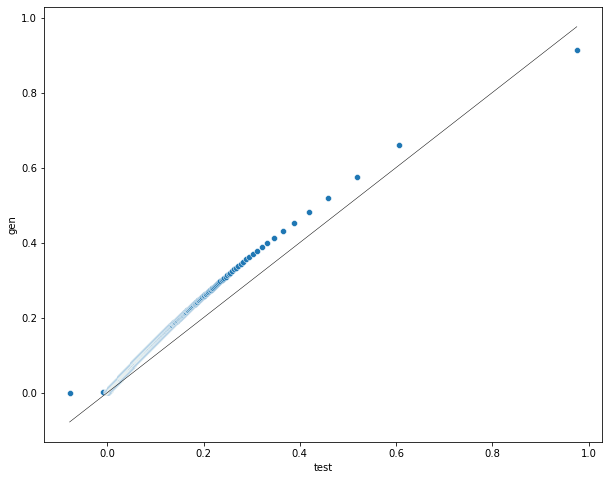

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="test",
    y="gen",
    ax=ax,
)

# ax.set_xlabel(None)
# ax.set_ylabel("clustermatch (linear)")

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

# ax.set_title(f"{ENRICH_FUNC} ({PERFORMANCE_MEASURE})")

In [42]:
# cm(gen_cm.to_numpy(), test_cm.to_numpy())

In [43]:
stats.pearsonr(gen_cm, test_cm)

(0.927455093662632, 0.0)

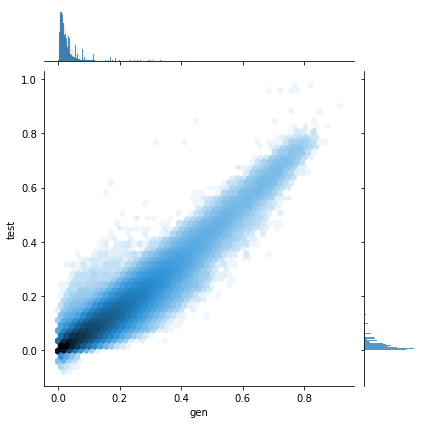

In [44]:
sns.jointplot(
    data=coefs,
    x="gen",
    y="test",
    kind="hex",
    bins="log",
)

/opt/conda/envs/clustermatch_gene_expr/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/clustermatch_gene_expr/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


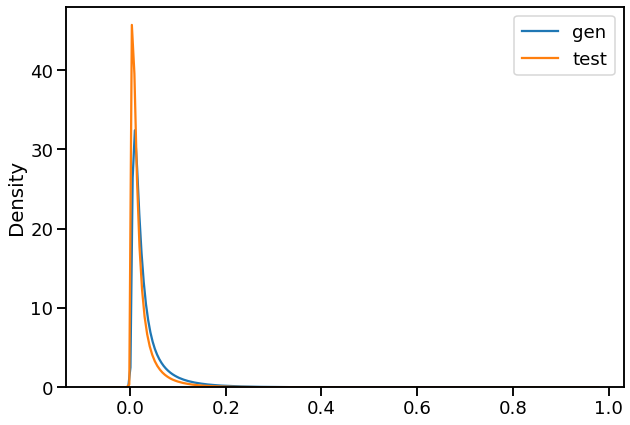

In [45]:
with sns.plotting_context("talk", font_scale=1.1):
    fig, ax = plt.subplots(figsize=(10, 7))

    for method in [x for x in coefs.columns]:
        sns.distplot(x=coefs[method], hist=False, kde=True, label=method, ax=ax)

    plt.legend()

/opt/conda/envs/clustermatch_gene_expr/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


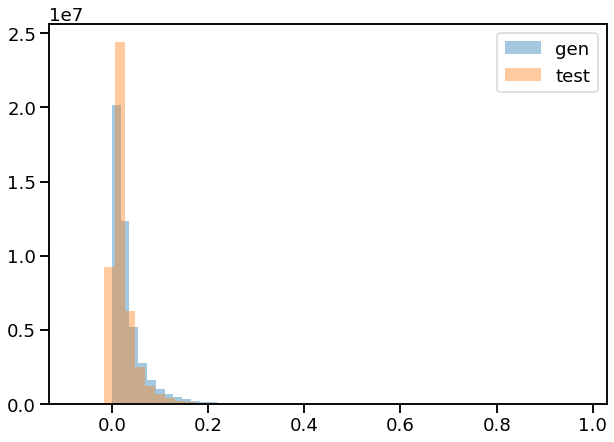

In [46]:
with sns.plotting_context("talk", font_scale=1.1):
    fig, ax = plt.subplots(figsize=(10, 7))

    for method in [x for x in coefs.columns]:
        sns.distplot(x=coefs[method], hist=True, kde=False, label=method, ax=ax)

    plt.legend()

In [47]:
coefs.describe()

,gen,test
count,4.559648e+07,4.559648e+07
mean,3.489632e-02,2.399692e-02
std,4.224736e-02,3.260522e-02
min,-1.302268e-04,-7.863955e-02
25%,1.123185e-02,6.701603e-03
50%,2.088611e-02,1.350828e-02
75%,4.127729e-02,2.791407e-02
max,9.144237e-01,9.756530e-01


In [48]:
_start, _step, _n = 0.10, 0.10, 9
coefs_q = coefs.quantile(np.linspace(_start, _start + (_step * _n), _n, endpoint=False))
display(coefs_q)

,gen,test
0.1,0.006627,0.003584
0.2,0.009694,0.005647
0.3,0.012842,0.007830
0.4,0.016443,0.010365
0.5,0.020886,0.013508
0.6,0.026748,0.017643
0.7,0.035126,0.023668
0.8,0.049184,0.033670
0.9,0.078645,0.054992


# Interesting gene pairs

In [59]:
_tmp_coefs = coefs.assign(diff=coefs["test"].sub(coefs["gen"])).sort_values(
    "diff", ascending=False
)

In [241]:
_tmp_coefs.head(20)

,,gen,test,diff
CRLF3,PLSCR4,0.169776,0.620095,0.450318
NIPAL2,FUS,0.326307,0.762812,0.436505
CD209,PLSCR4,0.156937,0.586500,0.429563
STAC,MRPL50,0.450249,0.834244,0.383995
CRLF3,CD209,0.413451,0.760693,0.347242
SYCE2,CRLF3,0.061670,0.364580,0.302910
HIST1H2BJ,ANXA8,0.201305,0.502563,0.301258
C5orf22,SYCE2,0.029406,0.309356,0.279950
SYCE2,CES1,0.038574,0.317425,0.278851
CBX3,RP1,0.065066,0.339542,0.274476


In [242]:
gene0, gene1 = _tmp_coefs.iloc[2].name
display((gene0, gene1))

# _clustermatch = df.loc[(gene0, gene1), ["pearson", "spearman", "clustermatch"]].tolist()

('CD209', 'PLSCR4')

In [243]:
# _title = f"Clustermatch: {_clustermatch:.2f}\nPearson/Spearman: {_pearson:.2f}/{_spearman:.2f}"

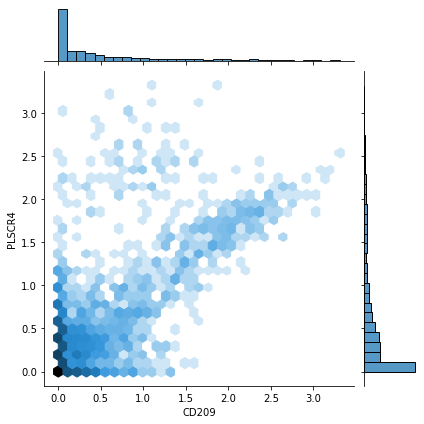

In [244]:
p = sns.jointplot(
    data=gen_data.T,
    x=gene0,
    y=gene1,
    kind="hex",
    bins="log",
)

# gene_x_id = p.ax_joint.get_xlabel()
# gene_x_symbol = gene_map[gene_x_id]
# p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")

# gene_y_id = p.ax_joint.get_ylabel()
# gene_y_symbol = gene_map[gene_y_id]
# p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")

# p.fig.suptitle(_title)

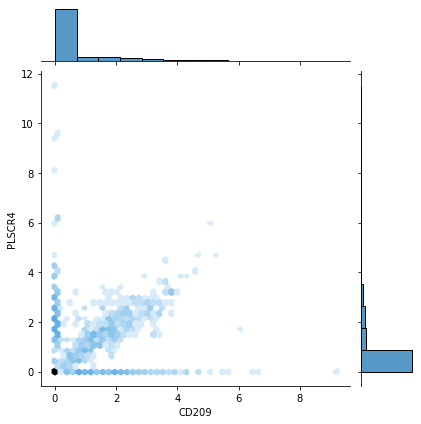

In [245]:
p = sns.jointplot(
    data=test_data.T,
    x=gene0,
    y=gene1,
    kind="hex",
    bins="log",
)

# gene_x_id = p.ax_joint.get_xlabel()
# gene_x_symbol = gene_map[gene_x_id]
# p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")

# gene_y_id = p.ax_joint.get_ylabel()
# gene_y_symbol = gene_map[gene_y_id]
# p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")

# p.fig.suptitle(_title)

In [246]:
_tmp = test_data.T[[gene0, gene1]]

display(_tmp.corr())

display(cm(_tmp.T.to_numpy()))

display(_tmp.shape)
display(_tmp.describe())

,CD209,PLSCR4
CD209,1.000000,0.470636
PLSCR4,0.470636,1.000000


0.586499825819842

(2287, 2)

,CD209,PLSCR4
count,2287.000000,2287.000000
mean,0.416980,0.436070
std,0.946684,0.994697
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,9.191132,11.513175


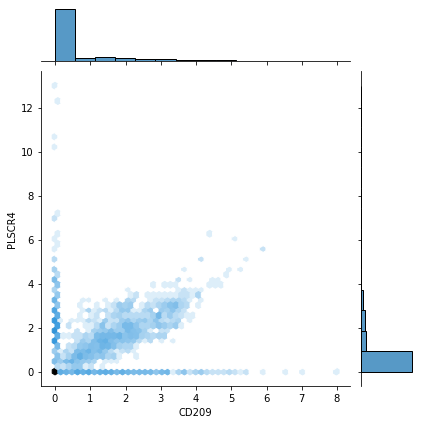

In [247]:
p = sns.jointplot(
    data=train_data.T,
    x=gene0,
    y=gene1,
    kind="hex",
    bins="log",
)

# gene_x_id = p.ax_joint.get_xlabel()
# gene_x_symbol = gene_map[gene_x_id]
# p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")

# gene_y_id = p.ax_joint.get_ylabel()
# gene_y_symbol = gene_map[gene_y_id]
# p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")

# p.fig.suptitle(_title)

In [248]:
_tmp = train_data.T[[gene0, gene1]]

display(_tmp.corr())

display(cm(_tmp.T.to_numpy()))

display(_tmp.shape)
display(_tmp.describe())

,CD209,PLSCR4
CD209,1.000000,0.557274
PLSCR4,0.557274,1.000000


0.6011440659842143

(6860, 2)

,CD209,PLSCR4
count,6860.000000,6860.000000
mean,0.412743,0.430802
std,0.922839,0.959788
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,7.978122,12.996510


# Test is higher

In [78]:
# gen higher
_tmp_test_higher = coefs[
    (coefs["test"] >= coefs_q.loc[0.90, "test"])
    & (coefs["gen"] <= coefs_q.loc[0.10, "gen"])
].sort_values("test", ascending=False)

display(_tmp_test_higher.shape)
display(_tmp_test_higher)

(788, 2)

,,gen,test
SYCE2,MEAF6,0.006272,0.194261
RTCB,A4GALT,0.004624,0.160559
CEP85,EXD1,0.004701,0.138220
SPIN2B,CRLF3,0.005966,0.135742
GPBP1L1,PRDM16,0.006244,0.123542
...,...,...,...
XPNPEP3,MAMSTR,0.004897,0.055077
OMD,MT-ATP6,0.004827,0.055014
PIN4,OR1L8,0.004588,0.055005
HIST2H2AA4,VPS33A,0.005853,0.055000


In [199]:
gene0, gene1 = _tmp_test_higher.iloc[26].name
display((gene0, gene1))

# _clustermatch = df.loc[(gene0, gene1), ["pearson", "spearman", "clustermatch"]].tolist()

('SERPINA3', 'TAF6L')

In [200]:
# _title = f"Clustermatch: {_clustermatch:.2f}\nPearson/Spearman: {_pearson:.2f}/{_spearman:.2f}"

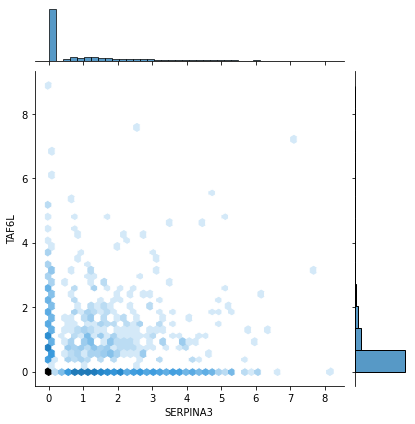

In [201]:
p = sns.jointplot(
    data=test_data.T,
    x=gene0,
    y=gene1,
    kind="hex",
    bins="log",
)

# gene_x_id = p.ax_joint.get_xlabel()
# gene_x_symbol = gene_map[gene_x_id]
# p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")

# gene_y_id = p.ax_joint.get_ylabel()
# gene_y_symbol = gene_map[gene_y_id]
# p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")

# p.fig.suptitle(_title)

In [202]:
_tmp = test_data.T[[gene0, gene1]]

display(_tmp.corr())

display(cm(_tmp.T.to_numpy(), internal_n_clusters=None))

display(_tmp.shape)
display(_tmp.describe())

,SERPINA3,TAF6L
SERPINA3,1.000000,0.116783
TAF6L,0.116783,1.000000


0.0985072328874322

(2287, 2)

,SERPINA3,TAF6L
count,2287.000000,2287.000000
mean,0.848425,0.355289
std,1.315298,0.837061
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.354538,0.000000
max,8.144479,8.872284


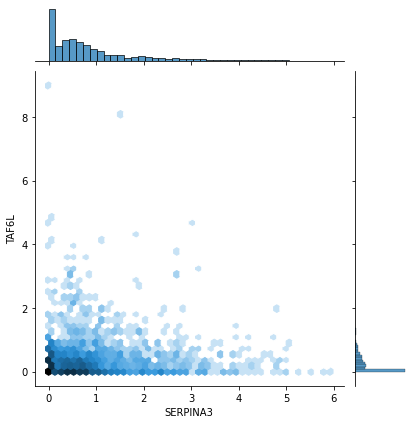

In [203]:
p = sns.jointplot(
    data=gen_data.T,
    x=gene0,
    y=gene1,
    kind="hex",
    bins="log",
)

# gene_x_id = p.ax_joint.get_xlabel()
# gene_x_symbol = gene_map[gene_x_id]
# p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")

# gene_y_id = p.ax_joint.get_ylabel()
# gene_y_symbol = gene_map[gene_y_id]
# p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")

# p.fig.suptitle(_title)

In [205]:
_tmp = gen_data.T[[gene0, gene1]]

display(_tmp.corr())

display(cm(_tmp.T.to_numpy(), internal_n_clusters=None))

display(_tmp.shape)
display(_tmp.describe())

,SERPINA3,TAF6L
SERPINA3,1.000000,0.023215
TAF6L,0.023215,1.000000


0.0026228872051693494

(2287, 2)

,SERPINA3,TAF6L
count,2287.000000,2287.000000
mean,0.870402,0.385480
std,0.962267,0.622237
min,0.000000,0.000000
25%,0.179525,0.000000
50%,0.588758,0.201526
75%,1.143042,0.497859
max,5.922647,8.984008


# Gen is higher

In [206]:
# gen higher
_tmp_gen_higher = coefs[
    (coefs["gen"] >= coefs_q.loc[0.90, "gen"])
    & (coefs["test"] <= coefs_q.loc[0.10, "test"])
].sort_values("gen", ascending=False)

display(_tmp_gen_higher.shape)
display(_tmp_gen_higher)

(80, 2)

gen      test
PRKACA MFSD6    0.109752  0.002797
PARN   HES1     0.105155  0.002936
SUN2   TRIM44   0.104588  0.001818
       SYNPO    0.099547  0.002845
CNOT10 SLAMF1   0.098995  0.003006
...                  ...       ...
THAP4  SMIM20   0.079137  0.003562
CHRNA9 BCL9L    0.079137  0.002018
BSDC1  RPL36    0.078645  0.002133
FSIP1  CTTNBP2  0.078645  0.001564
MT-CO2 FSIP1    0.078645  0.002680

[80 rows x 2 columns]

In [229]:
gene0, gene1 = _tmp_gen_higher.iloc[2].name
display((gene0, gene1))

# _clustermatch = df.loc[(gene0, gene1), ["pearson", "spearman", "clustermatch"]].tolist()

('SUN2', 'TRIM44')

In [230]:
# _title = f"Clustermatch: {_clustermatch:.2f}\nPearson/Spearman: {_pearson:.2f}/{_spearman:.2f}"

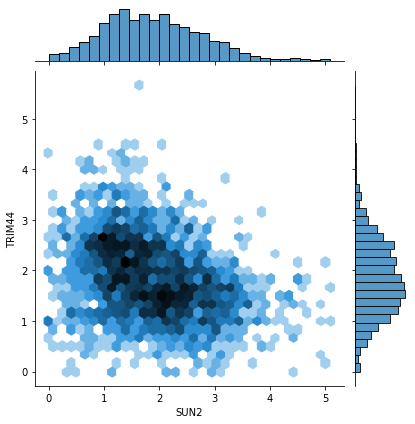

In [231]:
p = sns.jointplot(
    data=gen_data.T,
    x=gene0,
    y=gene1,
    kind="hex",
    bins="log",
)

# gene_x_id = p.ax_joint.get_xlabel()
# gene_x_symbol = gene_map[gene_x_id]
# p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")

# gene_y_id = p.ax_joint.get_ylabel()
# gene_y_symbol = gene_map[gene_y_id]
# p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")

# p.fig.suptitle(_title)

In [232]:
_tmp = gen_data.T[[gene0, gene1]]

display(_tmp.corr())

display(cm(_tmp.T.to_numpy(), internal_n_clusters=None))

display(_tmp.shape)
display(_tmp.describe())

,SUN2,TRIM44
SUN2,1.000000,-0.328788
TRIM44,-0.328788,1.000000


0.1045877063479932

(2287, 2)

,SUN2,TRIM44
count,2287.000000,2287.000000
mean,1.881074,1.848146
std,0.876844,0.766303
min,0.000000,0.000000
25%,1.229344,1.299352
50%,1.804230,1.785295
75%,2.450505,2.374629
max,5.081167,5.652531


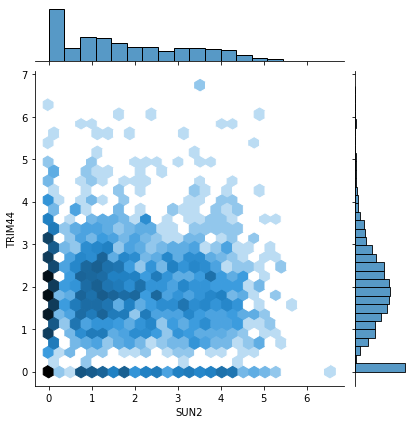

In [233]:
p = sns.jointplot(
    data=test_data.T,
    x=gene0,
    y=gene1,
    kind="hex",
    bins="log",
)

# gene_x_id = p.ax_joint.get_xlabel()
# gene_x_symbol = gene_map[gene_x_id]
# p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")

# gene_y_id = p.ax_joint.get_ylabel()
# gene_y_symbol = gene_map[gene_y_id]
# p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")

# p.fig.suptitle(_title)

In [234]:
_tmp = test_data.T[[gene0, gene1]]

display(_tmp.corr())

display(cm(_tmp.T.to_numpy(), internal_n_clusters=None))

display(_tmp.shape)
display(_tmp.describe())

,SUN2,TRIM44
SUN2,1.000000,-0.031647
TRIM44,-0.031647,1.000000


0.0018183963533444304

(2287, 2)

,SUN2,TRIM44
count,2287.000000,2287.000000
mean,1.759551,1.832244
std,1.460633,1.109166
min,0.000000,0.000000
25%,0.536493,1.156881
50%,1.463255,1.829376
75%,2.952825,2.474856
max,6.543307,6.730457


## Other

In [ ]:
gene0, gene1 = "KDM6A", "UTY"
display((gene0, gene1))

In [ ]:
p = sns.jointplot(
    data=gen_data.T,
    x=gene0,
    y=gene1,
    kind="hex",
    bins="log",
)

# gene_x_id = p.ax_joint.get_xlabel()
# gene_x_symbol = gene_map[gene_x_id]
# p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")

# gene_y_id = p.ax_joint.get_ylabel()
# gene_y_symbol = gene_map[gene_y_id]
# p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")

# p.fig.suptitle(_title)